# Step 1: Importing packages and libraries

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 21.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast
from transformers import BertModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Loading datatset and BERT Model

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the CSV file with specified options
df = pd.read_csv('/content/drive/My Drive/embedding_data/concat_embedding_data.csv')

In [7]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Sentence_row,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,0,45.0,45,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59.0,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,1,49.0,49,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66.0,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,2,63.0,63,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80.0,"[-0.3184204399585724, -0.004366732202470303, -..."
3,3,65.0,65,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83.0,"[0.19683706760406494, 0.23691487312316895, -0...."
4,4,72.0,72,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90.0,"[-0.11486530303955078, 0.16750510036945343, 0...."


In [8]:
model_ckpt = "bert-base-cased"
model = BertModel.from_pretrained(model_ckpt)

In [9]:
df.shape

(20719, 13)

In [11]:
df.isnull().sum()

Unnamed: 0.2                  0
Unnamed: 0.1              16691
Unnamed: 0                    0
Sentence_row                  0
Word_count                    0
Sentence                      0
Sentence_no                   0
Word                          0
POS                           0
end_labels                    0
subword                   20154
word_index                    0
contextualized_vectors        0
dtype: int64

In [12]:
df_fin = df.iloc[:,3:] # optional
df_fin.head()

,Sentence_row,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59.0,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66.0,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80.0,"[-0.3184204399585724, -0.004366732202470303, -..."
3,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83.0,"[0.19683706760406494, 0.23691487312316895, -0...."
4,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90.0,"[-0.11486530303955078, 0.16750510036945343, 0...."


# Basic Operations

In [13]:
df_fin.shape

(20719, 10)

In [14]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20719 entries, 0 to 20718
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sentence_row            20719 non-null  object 
 1   Word_count              20719 non-null  float64
 2   Sentence                20719 non-null  object 
 3   Sentence_no             20719 non-null  int64  
 4   Word                    20719 non-null  object 
 5   POS                     20719 non-null  object 
 6   end_labels              20719 non-null  float64
 7   subword                 565 non-null    object 
 8   word_index              20719 non-null  float64
 9   contextualized_vectors  20719 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.6+ MB


In [15]:
df_fin.isnull().sum()

Sentence_row                  0
Word_count                    0
Sentence                      0
Sentence_no                   0
Word                          0
POS                           0
end_labels                    0
subword                   20154
word_index                    0
contextualized_vectors        0
dtype: int64

In [ ]:
# Drop rows with missing data
#df_fin = df_fin.dropna(subset=['contextualized_vectors'])

In [ ]:
#df_fin.isnull().sum()

# EDA and Preprocessing

# Group by a Single Column and Count Frequencies:
To count the frequencies of each unique value in a specific column, you can use the groupby method followed by the count() method.

In [16]:
# Example: Count frequencies of each POS tag
pos_counts = df_fin.groupby('POS')['Word'].count()
pos_counts

POS
ADJ          3
ADP          5
DET          3
NOUN      8968
NUM          2
PRON     11707
PROPN       18
VERB        13
Name: Word, dtype: int64

# Group by Multiple Columns and Calculate Summary Statistics:
You can group by multiple columns and calculate summary statistics like mean, median, or standard deviation.

In [18]:
# Example: Calculate mean wort_index for each POS tag
pos_mean = df_fin.groupby('POS')['word_index'].mean()
print(pos_mean)


POS
ADJ      34.333333
ADP      12.600000
DET       1.000000
NOUN     14.695919
NUM       5.500000
PRON     14.293500
PROPN    10.555556
VERB     20.000000
Name: word_index, dtype: float64


# Count Unique Values within Groups:
You can count unique values within groups using the nunique() method.

In [19]:
# Example: Count unique words within each POS group
pos_unique_words = df_fin.groupby('POS')['Word'].nunique()
print(pos_unique_words)


POS
ADJ         3
ADP         1
DET         1
NOUN     2019
NUM         1
PRON       59
PROPN       9
VERB        6
Name: Word, dtype: int64


# Group by and Filter Data:
You can group by a column and filter data based on group-specific conditions.

In [20]:
# Example: Filter rows where the count of words within each POS group is greater than a threshold
filtered_df = df_fin.groupby('POS').filter(lambda group: len(group) > 100)
filtered_df

,Sentence_row,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59.0,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66.0,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80.0,"[-0.3184204399585724, -0.004366732202470303, -..."
3,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83.0,"[0.19683706760406494, 0.23691487312316895, -0...."
4,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90.0,"[-0.11486530303955078, 0.16750510036945343, 0...."
...,...,...,...,...,...,...,...,...,...,...
20714,270 people died in the 1988 bombing over the S...,13.0,"('270', 'people', 'died', 'in', 'the', '1988',...",307826,bombing,NOUN,0.0,NaN,7.0,"[0.7685377597808838, 1.115256905555725, -0.038..."
20715,Libya initially refused to hand over the two...,35.0,"('Libya', 'initially', 'refused', ' ', 'to', '...",307827,them,PRON,0.0,NaN,13.0,"[0.11229103803634644, 0.16903077065944672, -0...."
20716,Libya initially refused to hand over the two...,35.0,"('Libya', 'initially', 'refused', ' ', 'to', '...",307827,they,PRON,0.0,NaN,21.0,"[0.4275742769241333, 0.07952270656824112, 0.25..."
20717,Opinion polls in Israel show hard - liner Arie...,27.0,"('Opinion', 'polls', 'in', 'Israel', 'show', '...",307829,liner,NOUN,0.0,NaN,10.0,"[0.5175453424453735, -0.12556852400302887, -0...."


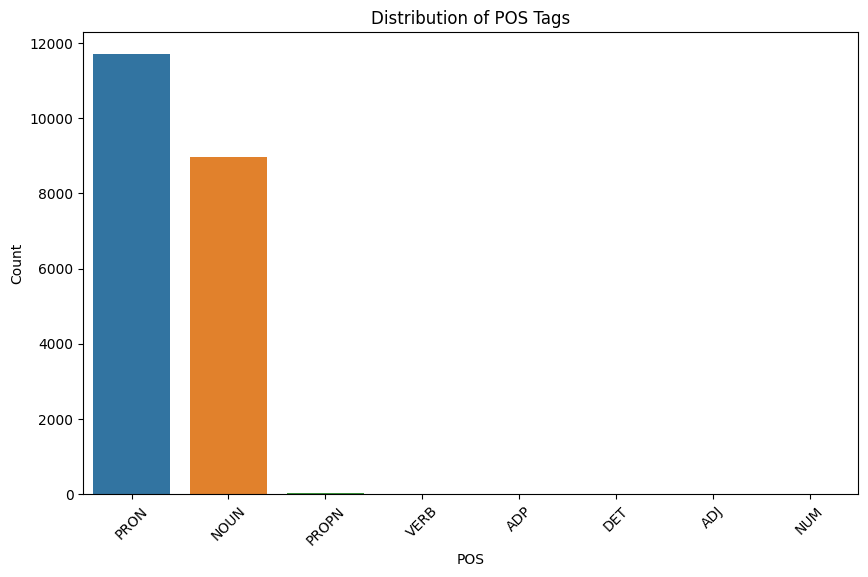

In [21]:
# Plot 1: Distribution of 'POS' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fin, x='POS', order=df_fin['POS'].value_counts().index)
plt.xlabel('POS')
plt.ylabel('Count')
plt.title('Distribution of POS Tags')
plt.xticks(rotation=45)
plt.show()

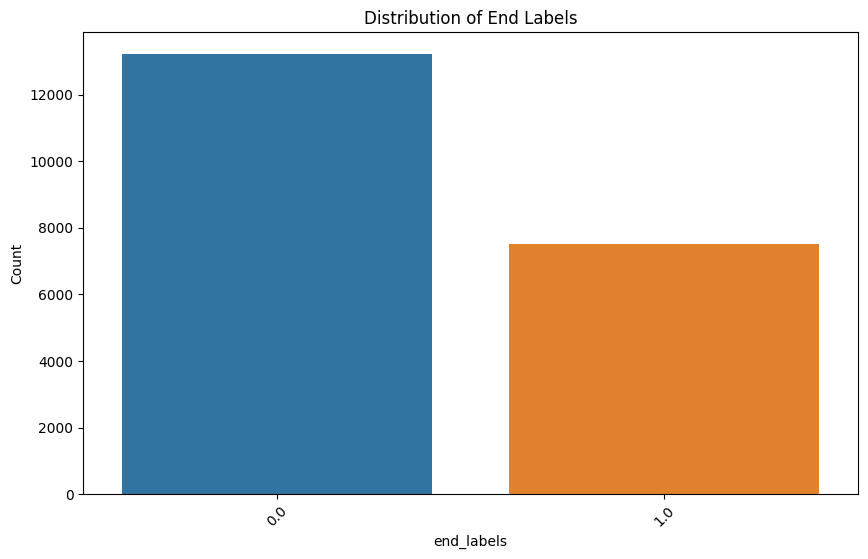

In [22]:
# Plot 2: Distribution of 'end_labels' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fin, x='end_labels', order=df_fin['end_labels'].value_counts().index)
plt.xlabel('end_labels')
plt.ylabel('Count')
plt.title('Distribution of End Labels')
plt.xticks(rotation=45)
plt.show()

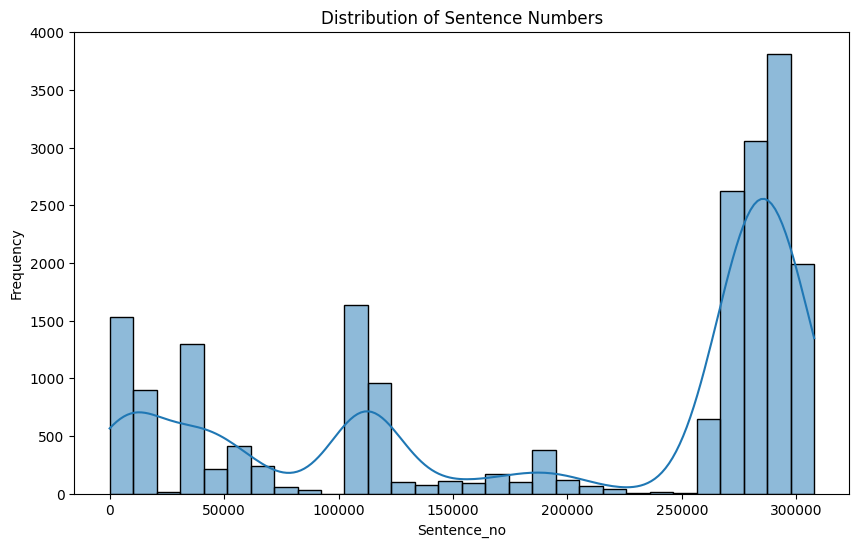

In [23]:
# Plot 3: Distribution of 'Sentence_no' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fin, x='Sentence_no', bins=30, kde=True)
plt.xlabel('Sentence_no')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Numbers')
plt.show()

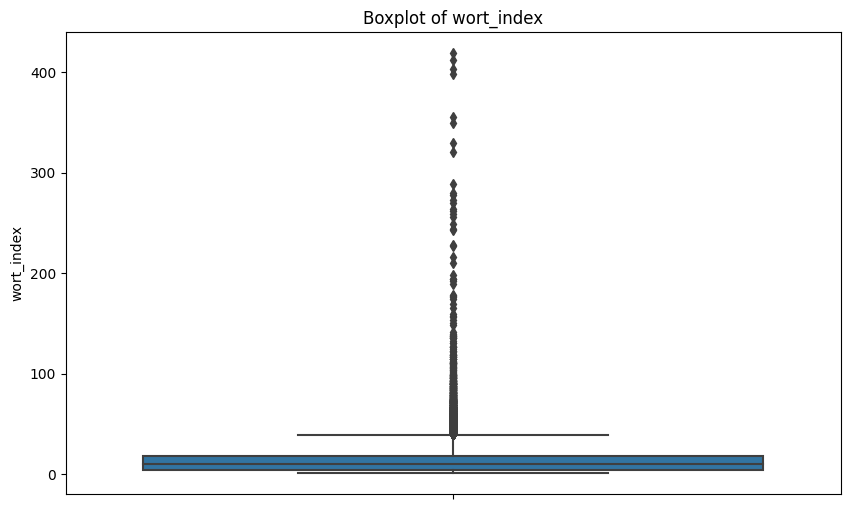

In [25]:
# Plot 4: Boxplot of 'wort_index'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fin, y='word_index')
plt.ylabel('wort_index')
plt.title('Boxplot of wort_index')
plt.show()

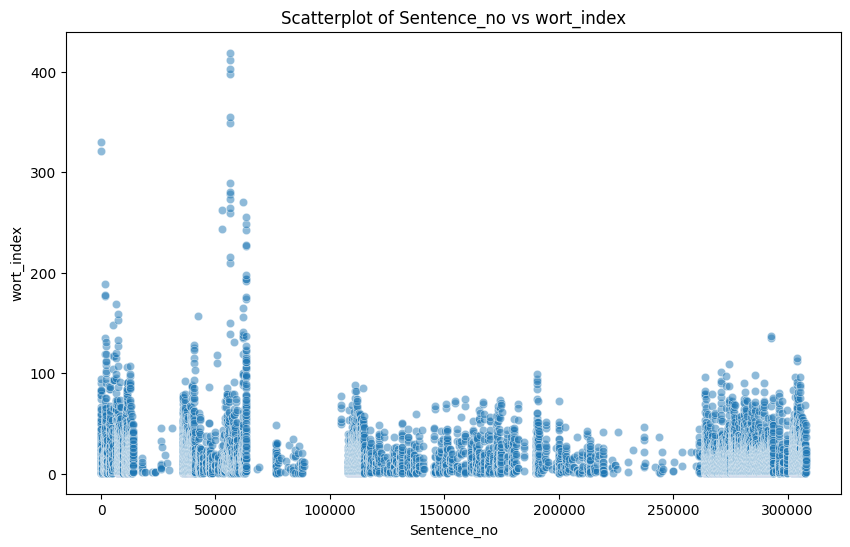

In [27]:
# Plot 5: Example scatterplot (customize as needed)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fin, x='Sentence_no', y='word_index', alpha=0.5)
plt.xlabel('Sentence_no')
plt.ylabel('wort_index')
plt.title('Scatterplot of Sentence_no vs wort_index')
plt.show()

In [28]:
df_fin["end_labels"]= df_fin["end_labels"].astype(int)

# Prob Architecture Implementation

In [29]:
df_fin['end_labels'].value_counts()

0    13216
1     7503
Name: end_labels, dtype: int64

In [30]:
# Standardize input features
scaler = StandardScaler()
X = np.vstack(df_fin['contextualized_vectors'].apply(literal_eval))
X = scaler.fit_transform(X)

In [31]:
samples=len(X)
indicies=np.arange(samples)
df_fin.index=indicies

In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, df_fin['end_labels'], indicies, test_size=0.2, random_state=30)

In [33]:
# Implement logistic regression or your custom neural network
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8438706563706564
F1-Score: 0.7852638566213077
Confusion Matrix:


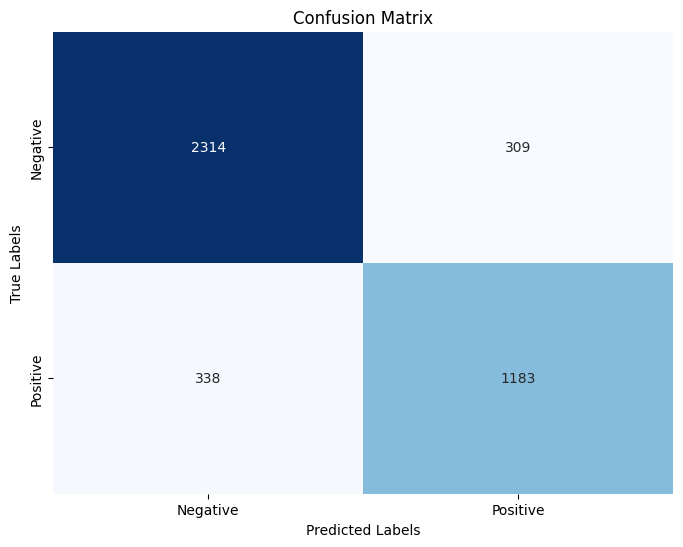

In [34]:

# Evaluate the logistic regression model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analyzing the results


In [37]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict pronouns and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_pron=0
count_incorrect_pron=0
all_pron=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "PRON":
        all_pron+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_pron+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_pron+=1
print("all_pron",all_pron)
print("correct_pron",count_correct_pron)
print("incorrect_pron",count_incorrect_pron)




    #print("Prediction for words in '{}': {} True Label : {} subtoken : {}".format(row["Word"], y_pred_word[0], row["end_labels"],row["subtoken"]))

all_pron 2335
correct_pron 1521
incorrect_pron 814


In [39]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict nouns and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_noun=0
count_incorrect_noun=0
all_noun=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "NOUN":
        all_noun+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun+=1
print("all_noun",all_noun)
print("correct_noun",count_correct_noun)
print("incorrect_noun",count_incorrect_noun)

all_noun 1799
correct_noun 1496
incorrect_noun 303


In [41]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict PROPN and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_propn=0
count_incorrect_propn=0
all_propn=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "PROPN":
        all_propn+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_propn+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_propn+=1
print("all_propn",all_propn)
print("correct_propn",count_correct_propn)
print("incorrect_propn",count_incorrect_propn)


all_propn 5
correct_propn 5
incorrect_propn 0


In [43]:


# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Counting the number of correctly and incorrectly classified names with and without subtokens
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_noun_subtoken=0
count_incorrect_noun_subtoken=0
all_noun_subtoken=0
all_noun_without_subtoken=0
count_correct_noun_without_subtoken=0
count_incorrect_noun_without_subtoken=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "NOUN" and type(row["subword"]) != float:
        all_noun_subtoken+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun_subtoken+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun_subtoken+=1
    if row["POS"] == "NOUN" and type(row["subword"]) == float:
        all_noun_without_subtoken+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun_without_subtoken+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun_without_subtoken+=1


print("all_noun_subtoken",all_noun_subtoken)
print("count_correct_noun_subtoken",count_correct_noun_subtoken)
print("count_incorrect_noun_subtoken",count_incorrect_noun_subtoken)
print("-----------------------------------------------")
print("all_noun_without_subtoken",all_noun_without_subtoken)
print("count_correct_noun_without_subtoken",count_correct_noun_without_subtoken)
print("count_incorrect_noun_without_subtoken",count_incorrect_noun_without_subtoken)

all_noun_subtoken 128
count_correct_noun_subtoken 82
count_incorrect_noun_subtoken 46
-----------------------------------------------
all_noun_without_subtoken 1671
count_correct_noun_without_subtoken 1414
count_incorrect_noun_without_subtoken 257


In [45]:
filtered_pron_without_subtoken = test_d.loc[(test_d['POS'] =="PRON") & (test_d['subword'].isnull())]
len(filtered_pron_without_subtoken)

2334

In [47]:
# Only two pronouns in test-data bekamme from tokenizer subtoken
filtered_pron_subtoken = test_d.loc[(test_d['POS'] =="PRON") & (test_d['subword'].notnull())]
len(filtered_pron_subtoken)

1

In [48]:
# Implement a custom neural network with optimization techniques
class BinaryClassificationNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(BinaryClassificationNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.ReLU()(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

input_dim = X_train.shape[1]
hidden_dim = 50
learning_rate = 0.01
epochs = 40

model = BinaryClassificationNN(input_dim, hidden_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')


Epoch 1/40, Loss: 0.719235897064209
Epoch 2/40, Loss: 0.5167015194892883
Epoch 3/40, Loss: 0.427690714597702
Epoch 4/40, Loss: 0.40002334117889404
Epoch 5/40, Loss: 0.38017576932907104
Epoch 6/40, Loss: 0.35553351044654846
Epoch 7/40, Loss: 0.34258097410202026
Epoch 8/40, Loss: 0.33374932408332825
Epoch 9/40, Loss: 0.32458823919296265
Epoch 10/40, Loss: 0.3187549114227295
Epoch 11/40, Loss: 0.3122939467430115
Epoch 12/40, Loss: 0.3062630295753479
Epoch 13/40, Loss: 0.3017062842845917
Epoch 14/40, Loss: 0.2963922321796417
Epoch 15/40, Loss: 0.29144617915153503
Epoch 16/40, Loss: 0.2879081964492798
Epoch 17/40, Loss: 0.2832338511943817
Epoch 18/40, Loss: 0.27842769026756287
Epoch 19/40, Loss: 0.27479711174964905
Epoch 20/40, Loss: 0.2702704966068268
Epoch 21/40, Loss: 0.26608753204345703
Epoch 22/40, Loss: 0.2628018260002136
Epoch 23/40, Loss: 0.25863873958587646
Epoch 24/40, Loss: 0.25492992997169495
Epoch 25/40, Loss: 0.25122714042663574
Epoch 26/40, Loss: 0.2472001016139984
Epoch 27/4

In [49]:
# Evaluate the custom neural network
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32)).squeeze()
    predicted_labels = (test_outputs > 0.5).float()
    accuracy = (predicted_labels == torch.tensor(y_test.values, dtype=torch.float32)).float().mean()

print("Custom Neural Network Accuracy:", accuracy.item())

Custom Neural Network Accuracy: 0.8725868463516235


F1-Score for Custom Neural Network: 0.8253968253968254


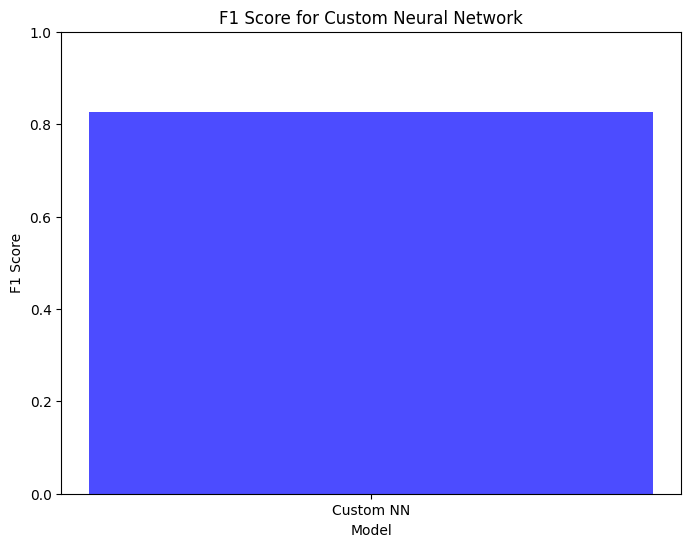

In [50]:
# F1 Score for Custom Neural Network
f1_custom_nn = f1_score(y_test, predicted_labels)

print("F1-Score for Custom Neural Network:", f1_custom_nn)

# Plot F1 Score
plt.figure(figsize=(8, 6))
plt.title("F1 Score for Custom Neural Network")
plt.bar(["Custom NN"], [f1_custom_nn], color='b', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()

Confusion Matrix for Custom Neural Network:
[[2368  255]
 [ 273 1248]]


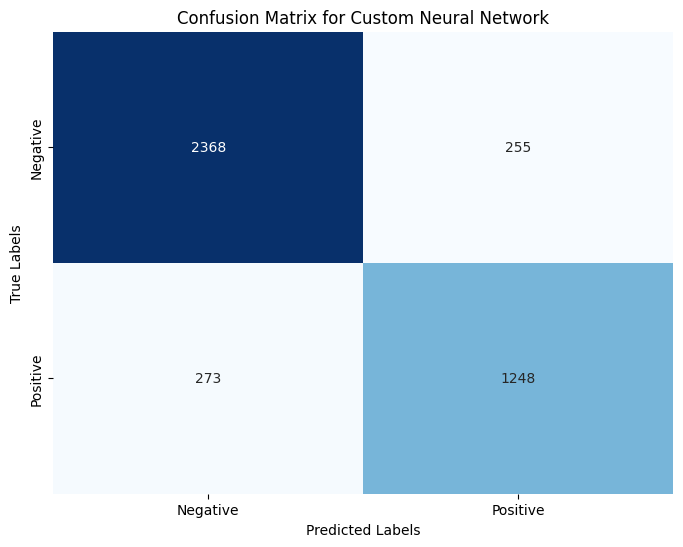

In [51]:

# Confusion Matrix for Custom Neural Network
confusion = confusion_matrix(y_test, predicted_labels)

print("Confusion Matrix for Custom Neural Network:")
print(confusion)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Custom Neural Network')
plt.show()